<a href="https://colab.research.google.com/github/RITWIK4959/RITWIK4959/blob/main/SERVO_PREDICTION_USING_LINEAR_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SERVO PREDICTION


#IMPORT LIBRARY

In [1]:
import pandas as pd

In [3]:
import numpy as np

#IMPORT CSV AS DATAFRAME

In [7]:
df = pd.read_csv(r'https://github.com/YBI-Foundation/Dataset/raw/main/Servo%20Mechanism.csv')

In [8]:
df.head()

Motor Screw  Pgain  Vgain  Class
0     E     E      5      4      4
1     B     D      6      5     11
2     D     D      4      3      6
3     B     A      3      2     48
4     D     B      6      5      6

In [10]:
df.tail()

Motor Screw  Pgain  Vgain  Class
162     B     C      3      2     44
163     B     E      3      1     40
164     C     D      4      3     25
165     A     B      3      2     44
166     A     A      6      5     20

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Motor   167 non-null    object
 1   Screw   167 non-null    object
 2   Pgain   167 non-null    int64 
 3   Vgain   167 non-null    int64 
 4   Class   167 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 6.6+ KB


In [12]:
df.columns

Index(['Motor', 'Screw', 'Pgain', 'Vgain', 'Class'], dtype='object')

In [13]:
df.describe()

Pgain       Vgain       Class
count  167.000000  167.000000  167.000000
mean     4.155689    2.538922   21.173653
std      1.017770    1.369850   13.908038
min      3.000000    1.000000    1.000000
25%      3.000000    1.000000   10.500000
50%      4.000000    2.000000   18.000000
75%      5.000000    4.000000   33.500000
max      6.000000    5.000000   51.000000

In [14]:
df[['Motor']].value_counts()

Motor
C        40
A        36
B        36
E        33
D        22
Name: count, dtype: int64

In [15]:
df[['Screw']].value_counts()

Screw
A        42
B        35
C        31
D        30
E        29
Name: count, dtype: int64

In [16]:
df.replace({'Motor':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [18]:
df.replace({'Screw':{'A':0,'B':1,'C':2,'D':3,'E':4}},inplace=True)

In [19]:
y=df['Class']
x=df[['Motor', 'Screw', 'Pgain', 'Vgain']]

In [20]:
x=df.drop('Class',axis=1)

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2529)

In [23]:
from sklearn.linear_model import LinearRegression

In [24]:
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred=lr.predict(x_test)

In [27]:
y_pred

array([25.56654851, 31.24940687, 19.04876502, 24.47852818, 39.37546387,
       24.37566459, 11.92192754, 19.94086363, 41.22109189, 41.9215261 ,
       13.76755557, 25.9225073 , 17.203137  , 15.50606268, 22.23125126,
       21.48770634, -4.92349976, 31.10343258, 32.9490606 ,  0.46057329,
       34.2402287 , 32.24862639, 34.53901401, 30.10421306, 18.94164411,
        7.03978758, 29.21211445, 16.9500418 , 24.77731349,  4.04896574,
       31.05774247, 23.93090499, 35.93988243, 31.94984108, 11.81480663,
        3.60420614, 22.63290015, 33.09503489, 16.65125649, 38.23027006,
       28.55737035, 21.78649166])

In [28]:
 lr.intercept_

80.5376313716901

In [29]:
lr.coef_

array([ -1.84562802,  -2.99082183, -15.29858459,   5.13523517])

In [32]:
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error,mean_absolute_error,r2_score

In [33]:
mean_absolute_percentage_error(y_test,y_pred)

0.7695731053957344

In [34]:
mean_squared_error(y_test,y_pred)

60.211561593192876

In [35]:
mean_absolute_error(y_test,y_pred)

6.735955685746795

In [36]:
r2_score(y_test,y_pred)

0.706476624263817

In [38]:
import matplotlib.pyplot as plt

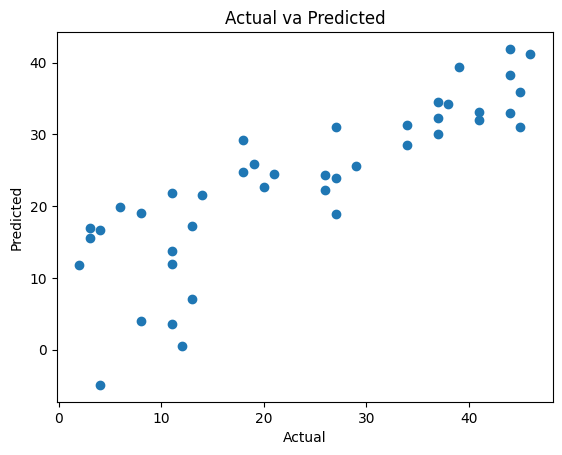

In [39]:
plt.scatter(y_test,y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual va Predicted")
plt.show()

In [40]:
x_new=df.sample(1)

In [41]:
x_new

Motor  Screw  Pgain  Vgain  Class
66      3      1      3      2     36

In [43]:
x_new=x_new.drop('Class',axis=1)

In [44]:
y_pred_new=lr.predict(x_new)

In [46]:
y_pred_new

array([36.38464204])